<hr>
<h3>Задание №2</h3>

Напишите скрипт для информационной системы библиотеки. База
данных библиотеки включает таблицы «Авторы» с полями «id»,
«имя», «страна», «годы жизни», и «Книги» с полями «id автора»,
«название», «количество страниц», «издательство», «год издания»).
Необходимо производить авторизацию пользователей, логины и
пароли которых хранятся в отдельной таблице. Пароли должны
храниться в зашифрованном виде (например, хэш SHA-1 или MD5).
В программе должны быть окна для отображения информации о
всех книгах и авторах, окно добавления книги/автора. Реализуйте
также возможность сохранения информации о выделенном авторе в
файле в формате json или XML (по выбору пользователя). При
добавлении нового автора в базу допускается не заполнять поля в
соответствующем окне, а распарсить файл, указанный
пользователем (файл необходимо заранее создать и заполнить
информацией вручную, в текстовом редакторе). Для преобразования
в формат XML и json напишите собственный код; парсинг можно
делать с помощью сторонних библиотек. Форматы файлов:

<hr>

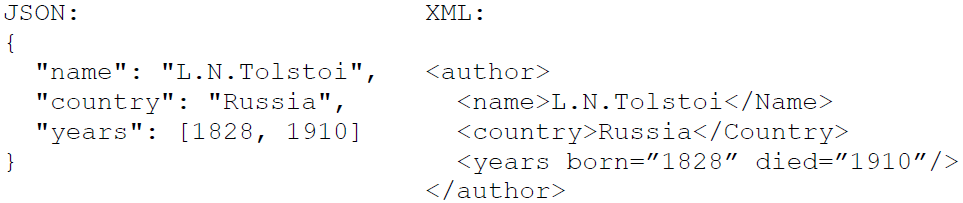

<hr>

In [1]:
import sqlite3
import hashlib
import re
import sys

# Parsing
import json
import xml.etree.ElementTree as ET

# PyQt
from PyQt5 import QtWidgets, QtGui, QtCore

In [2]:
def create_db():
    try:
        DBNAME = 'library.db'
        conn = sqlite3.connect(DBNAME)

        with conn:
            cursor = conn.cursor()

            cursor.execute('''CREATE TABLE authors (id INTEGER PRIMARY KEY,
                                      name TEXT NOT NULL,
                                      country TEXT NOT NULL,
                                      years_of_life TEXT NOT NULL)
            ''')
            conn.commit()

            cursor.execute('''CREATE TABLE books (id INTEGER PRIMARY KEY,
                                                  author_id INTEGER NOT NULL,
                                                  title TEXT NOT NULL,
                                                  pages INTEGER NOT NULL,
                                                  publisher TEXT NOT NULL,
                                                  year INTEGER NOT NULL,
                                                  FOREIGN KEY (author_id) REFERENCES authors(id))
            ''')
            conn.commit()

            cursor.execute('''CREATE TABLE users (id INTEGER PRIMARY KEY,
                                                  login TEXT NOT NULL UNIQUE,
                                                  password TEXT NOT NULL)
            ''')
            conn.commit()
            
            print('Database was created succesfully!')
        
    except sqlite3.OperationalError as e:
        print(e)

In [3]:
'''
# Test block:
try:
    create_db()
    print('Database was created succesfully!')
except sqlite3.OperationalError as e:
    print(e)
'''
None

In [4]:
def user_authorize(login, password):
    DBNAME = 'library.db'
    conn = sqlite3.connect(DBNAME)
    
    with conn:
        cursor = conn.cursor()
        cursor.execute('SELECT login, password from users')
        users = cursor.fetchall()
        
        for item in users:
            curr_login = list(item)[0]
            curr_password = list(item)[1]
            
            if login == curr_login:
                hashed_password = hashlib.md5(password.encode('utf-8')).hexdigest()
                
                if hashed_password == curr_password:
                    print("Login is successful")
                    return True
                
                else:
                    print("Invalid password!")
                    return False
                
        print("Invalid login!")
        return False
        
def add_user_authorize(login, password):
    DBNAME = 'library.db'
    conn = sqlite3.connect(DBNAME)
    
    with conn:
        cursor = conn.cursor()

        login = str(login).strip()
        password = str(password).strip()
        
        if not re.match(r'^[a-zA-Z0-9_]+$', login):
            print("\n -- Error --\n Incorrect login!")
            return
        
        if not re.match(r'^[a-zA-Z0-9_]+$', password):
            print("\n -- Error --\n Incorrect password!")
            return
        
        hashed_password = hashlib.md5(password.encode('utf-8')).hexdigest()
        
        cursor.execute('INSERT INTO users VALUES(NULL, ?, ?)',
                           (login, hashed_password))
        conn.commit()

In [5]:
'''
# Test regex func:
login = "Loger424_BOML "
login = login.strip()

if not re.match(r'^[a-zA-Z0-9_]+$', login):
    print("No! Login is incorrect!!")
else:
    print("Yes! Login is correct!!") 
'''
None

In [6]:
'''
# Test login functionality:
create_db()

login = "Login123"
password = "users12345"

# add_user_authorize(login, password)
user_authorize(login, password)
'''
None

In [7]:
def print_all_authors():
    DBNAME = 'library.db'
    conn = sqlite3.connect(DBNAME)
    
    with conn:
        cursor = conn.cursor()
        cursor.execute('SELECT * from authors')
        authors = cursor.fetchall()
        
        list_of_authors = []
        
        for author in authors:
            id = list(author)[0]
            name = list(author)[1]
            country = list(author)[2]
            years_of_life = eval(list(author)[3])
            
#             print("  Id: {0}\n  Name: {1}\n  Country: {2}\n  Years of Life: {3}\n"
#                   .format(id, name, country, years_of_life))

            author_to_list = [id, name, country, years_of_life]
            list_of_authors.append(author_to_list)
        
        return list_of_authors
            
            
def print_all_books():
    DBNAME = 'library.db'
    conn = sqlite3.connect(DBNAME)
    
    with conn:
        cursor = conn.cursor()
        
        cursor.execute('''SELECT books.id, authors.name, books.title, books.pages, books.publisher, books.year
                        from books INNER JOIN authors ON books.author_id = authors.id''')
        books = cursor.fetchall()
        
        list_of_books = []
        
        for book in books:
            id = list(book)[0]
            author = 'Unknown' if list(book)[1] == "" else list(book)[1]
            title = list(book)[2]
            pages = int(list(book)[3])
            publisher = list(book)[4]
            year = int(list(book)[5])
            
#             print("  Id: {0}\n  Author: {1}\n  Title: {2}\n  Pages: {3}\n  Publisher: {4}\n  Year: {5}\n"
#                   .format(id, author, title, pages, publisher, year))
            
            books_to_list = [id, author, title, pages, publisher, year]
            list_of_books.append(books_to_list)
        
        return list_of_books

In [8]:
def add_author(name, country, years_of_life):
    DBNAME = 'library.db'
    conn = sqlite3.connect(DBNAME)

    with conn:
        cursor = conn.cursor()

        name = str(name).strip()
        country = str(country).strip()
        years_of_life = str(years_of_life)
        
        if name == '' or country == '' or years_of_life == '':
            print("Empty value!")
            return
        
        cursor.execute('INSERT INTO authors VALUES(NULL, ?, ?, ?)',
                           (name, country, years_of_life))
        conn.commit()
        
        
def add_book(author, title, pages, publisher, year):
    DBNAME = 'library.db'
    conn = sqlite3.connect(DBNAME)

    with conn:
        cursor = conn.cursor()

        try:
            author = int(author)
            title = str(title).strip()
            pages = int(pages)
            publisher = str(publisher).strip()
            year = int(year)
        except sqlite3.OperationalError as e:
            print(e)
        
        if title == '' or publisher == '':
            print("Empty value!")
            return

        cursor.execute('INSERT INTO books VALUES(NULL, ?, ?, ?, ?, ?)',
                           (author, title, pages, publisher, year))
        conn.commit()

In [9]:
'''
# Test add value to the author:
name = "L.N.Tolstoi"
country = "Russia"
years_of_life = str([1828, 1910])

add_author(name, country, years_of_life)
'''
None

In [10]:
'''print_all_authors()'''
None

In [11]:
'''
# Test add value to the author:
author = 1
title = "Война и мир"
pages = 1300
publisher = "Русский вестник"
year = 1865

add_book(author, title, pages, publisher, year)
'''
None

In [12]:
'''print_all_books()'''
None

In [13]:
def save_in_json(data):
    json_data = {
        'name': data[0],
        'country': data[1],
        'years': data[2]
    }
    
    with open('author.json', 'w') as f:
        json.dump(json_data, f)
        
def save_in_xml(data):
    root = ET.Element('author')
    
    name = ET.SubElement(root, 'name')
    name.text = data[0]
    
    country = ET.SubElement(root, 'country')
    country.text = data[1]
    
    years = ET.SubElement(root, 'years', {'born': str(data[2][0]), 'died': str(data[2][1])})

    tree = ET.ElementTree(root)
    
    tree.write('author.xml', xml_declaration=True, encoding='utf-8')

In [14]:
'''
# Json save
data = ['L.N.Tolstoi', 'Russia', [1828, 1910]]
save_in_json(data)

#XML save
save_in_xml(data)
'''
None

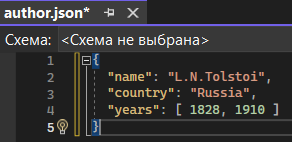 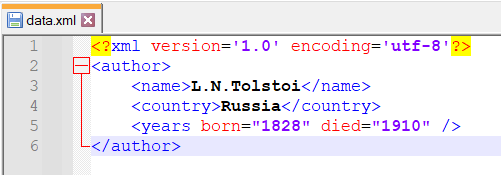

In [15]:
def formated_data(data):
    new_data = []
    new_data.append(data['name'])
    new_data.append(data['country'])
    new_data.append(data['years'])
    
    return new_data

def read_from_json(path):
    with open(path, 'r') as f:
        json_data = json.load(f)
    
    formated_json_data = formated_data(json_data)
    return formated_json_data

def read_from_xml(path):
    tree = ET.parse(path)
    root = tree.getroot()

    xml_data = {
        'name': root.find('name').text,
        'country': root.find('country').text,
        'years': [int(root.find('years').get('born')), int(root.find('years').get('died'))]
    }
    
    formated_xml_data = formated_data(xml_data)
    return formated_xml_data

In [16]:
'''
# Read Json file:
path_json = 'C:\\Users\\Raviolka\\author.json'
json_data = read_from_json(path_json)
print(json_data)

# Read Xml file:
path_xml = 'C:\\Users\\Raviolka\\author.xml'
xml_data = read_from_xml(path_xml)
print(xml_data)
'''
None

In [17]:
class LoginDialog(QtWidgets.QDialog):
    def __init__(self, parent=None):
        super(LoginDialog, self).__init__(parent)
        self.setWindowTitle('Login')
        self.resize(250, 200)

        # Создание виджетов
        self.user_label = QtWidgets.QLabel('Username:')
        self.user_text = QtWidgets.QLineEdit()
        self.pass_label = QtWidgets.QLabel('Password:')
        self.pass_text = QtWidgets.QLineEdit()
        self.pass_text.setEchoMode(QtWidgets.QLineEdit.Password)
        self.login_button = QtWidgets.QPushButton('Login')
        self.create_button = QtWidgets.QPushButton('Create new user')

        # Создание сетки для расположения виджетов
        grid = QtWidgets.QGridLayout()
        grid.addWidget(self.user_label, 0, 0, QtCore.Qt.AlignRight)
        grid.addWidget(self.user_text, 0, 1)
        grid.addWidget(self.pass_label, 1, 0, QtCore.Qt.AlignRight)
        grid.addWidget(self.pass_text, 1, 1)
        grid.addWidget(self.login_button, 2, 0, 1, 2)
        grid.addWidget(self.create_button, 3, 0, 1, 2)

        # Установка сетки для окна
        self.setLayout(grid)

        # Обработчик нажатия на кнопку
        self.login_button.clicked.connect(self.on_login_button)
        self.create_button.clicked.connect(self.on_create_button)

    def on_login_button(self):
        # Вызов метода авторизации
        if user_authorize(self.user_text.text(), self.pass_text.text()):
            self.accept()
        else:
            QtWidgets.QMessageBox.critical(self, 'Error', 'Login failed. Please try again.')
            
    def on_create_button(self):
        # Открытие диалогового окна для создания нового пользователя
        dlg = CreateUserDialog(self)
        if dlg.exec_() == QtWidgets.QDialog.Accepted:
            # Вызов метода добавления нового пользователя
            add_user_authorize(dlg.user_text.text(), dlg.pass_text.text())
            QtWidgets.QMessageBox.information(self, 'Success', 'User created successfully. You can now login with your new account.')
        dlg.deleteLater()
        
class CreateUserDialog(QtWidgets.QDialog):
    def __init__(self, parent=None):
        super(CreateUserDialog, self).__init__(parent)
        self.setWindowTitle('Create new user')
        self.resize(250, 150)

        # Создание виджетов
        self.user_label = QtWidgets.QLabel('Username:')
        self.user_text = QtWidgets.QLineEdit()
        self.pass_label = QtWidgets.QLabel('Password:')
        self.pass_text = QtWidgets.QLineEdit()
        self.pass_text.setEchoMode(QtWidgets.QLineEdit.Password)
        self.create_button = QtWidgets.QPushButton('Create')

        # Создание сетки для расположения виджетов
        grid = QtWidgets.QGridLayout()
        grid.addWidget(self.user_label, 0, 0, QtCore.Qt.AlignRight)
        grid.addWidget(self.user_text, 0, 1)
        grid.addWidget(self.pass_label, 1, 0, QtCore.Qt.AlignRight)
        grid.addWidget(self.pass_text, 1, 1)
        grid.addWidget(self.create_button, 2, 0, 1, 2)

        # Установка сетки для окна
        self.setLayout(grid)

        # Обработчик нажатия на кнопку
        self.create_button.clicked.connect(self.on_create_button)

    def on_create_button(self):
        # Проверка наличия введенных данных
        if not self.user_text.text() or not self.pass_text.text():
            QtWidgets.QMessageBox.critical(self, 'Error', 'Please enter username and password.')
            return

        # Закрытие окна с результатом QDialog.Accepted
        self.accept()

In [18]:
class MainWidget(QtWidgets.QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.authors = []
        self.books = []
        self.selected_author = None
        self.init_ui()

    def init_ui(self):
        self.setWindowTitle('Библиотека')
        self.resize(900, 500)
  
        author_label = QtWidgets.QLabel('Авторы:')
        self.author_list = QtWidgets.QListWidget()
        self.author_list.itemSelectionChanged.connect(self.author_selected)
        self.add_author_button = QtWidgets.QPushButton('Добавить автора')
        self.add_author_button.clicked.connect(self.add_author)
        
        book_label = QtWidgets.QLabel('Книги:')
        self.book_list = QtWidgets.QListWidget()
        self.add_book_button = QtWidgets.QPushButton('Добавить книгу')
        self.add_book_button.clicked.connect(self.add_book)
        
        save_button = QtWidgets.QPushButton('Сохранить в файл')
        save_button.clicked.connect(self.save_to_file)
        open_button = QtWidgets.QPushButton('Открыть файл')
        open_button.clicked.connect(self.open_file)
        
        layout = QtWidgets.QVBoxLayout()
        
        author_layout = QtWidgets.QVBoxLayout()
        author_layout.addWidget(author_label)
        author_layout.addWidget(self.author_list)
        author_layout.addWidget(self.add_author_button)
        
        book_layout = QtWidgets.QVBoxLayout()
        book_layout.addWidget(book_label)
        book_layout.addWidget(self.book_list)
        book_layout.addWidget(self.add_book_button)

        button_layout = QtWidgets.QHBoxLayout()
        button_layout.addWidget(save_button)
        button_layout.addWidget(open_button)
        
        layout.addLayout(author_layout)
        layout.addLayout(book_layout)
        layout.addLayout(button_layout)
        
        self.setLayout(layout)
        
        self.update_author_list()
        self.update_book_list()

    def update_author_list(self):
        self.authors = print_all_authors()

        self.author_list.clear()
        for author in self.authors:
            item = QtWidgets.QListWidgetItem(f"Name: '{author[1]}' Country: '{author[2]}' Years: '{author[3]}'")
            self.author_list.addItem(item)

    def update_book_list(self):
        self.books = print_all_books()

        self.book_list.clear()
        for book in self.books:
            item = QtWidgets.QListWidgetItem(f"Author: '{book[1]}' Title: '{book[2]}' Pages: '{book[3]}' Publisher: '{book[4]}' Year: '{book[5]}'")
            self.book_list.addItem(item)
            
    def add_author(self):
        dialog = AddAuthorDialog(self)
        if dialog.exec_() == QtWidgets.QDialog.Accepted:
            author_data = dialog.get_author_data()
            
            if author_data != None:
                add_author(author_data[0], 
                           author_data[1], 
                           author_data[2],)

                self.update_author_list()
        
    def add_book(self):
        dialog = AddBookDialog(self)
        if dialog.exec_() == QtWidgets.QDialog.Accepted:
            book_data = dialog.get_book_data()
            
            if book_data != None:
                add_book(book_data[0],
                         book_data[1],
                         book_data[2],
                         book_data[3],
                         book_data[4])

                self.update_book_list()
                
    def author_selected(self):
        selected_items = self.author_list.selectedItems()
        if not selected_items:
            return
        
        selected_items = selected_items[0].text().split()

        self.selected_author = [ selected_items[1][1 : -1],
                          selected_items[3][1 : -1],
                          eval(selected_items[5][1 :] + " " + selected_items[6][: -1])]

    def save_to_file(self):
        if self.selected_author is None:
            QtWidgets.QMessageBox.warning(self, 'Ошибка', 'Не выбран автор')
            return

        dialog = QtWidgets.QDialog(self)
        dialog.setWindowTitle('Выберите формат файла')
        dialog.setModal(True)
        dialog.setLayout(QtWidgets.QVBoxLayout())
        dialog.layout().addWidget(QtWidgets.QLabel('Выберите формат файла:'))

        json_radio = QtWidgets.QRadioButton('JSON')
        xml_radio = QtWidgets.QRadioButton('XML')
        
        json_radio.setChecked(True)
        
        dialog.layout().addWidget(json_radio)
        dialog.layout().addWidget(xml_radio)

        buttons = QtWidgets.QDialogButtonBox(QtWidgets.QDialogButtonBox.Ok | QtWidgets.QDialogButtonBox.Cancel, QtCore.Qt.Horizontal, self)
        dialog.layout().addWidget(buttons)

        def save():
            if json_radio.isChecked():
                save_in_json(self.selected_author)
            elif xml_radio.isChecked():
                save_in_xml(self.selected_author)
            dialog.accept()

        buttons.accepted.connect(save)
        buttons.rejected.connect(dialog.reject)

        dialog.show()
        dialog.exec_()
        
    def open_file(self):
        file_filter = 'JSON (*.json);;XML (*.xml)'
        file_path, _ = QtWidgets.QFileDialog.getOpenFileName(self, 'Выберите файл', '', file_filter)
        if file_path:
            if file_path[-4:] == ".xml":
                new_author = read_from_xml(file_path)
                add_author(new_author[0], new_author[1], new_author[2])
                
                self.update_author_list()
            elif file_path[-5:] == ".json":
                new_author = read_from_json(file_path)
                add_author(new_author[0], new_author[1], new_author[2])
                
                self.update_author_list()
            else: 
                print("Incorrect format!")

In [19]:
class AddAuthorDialog(QtWidgets.QDialog):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.setWindowTitle('Добавление автора')
        self.setModal(True)
        self.resize(300, 200)

        # поля для автора
        self.author_name_edit = QtWidgets.QLineEdit()
        self.author_country_edit = QtWidgets.QLineEdit()
        self.author_birth_edit = QtWidgets.QSpinBox()
        self.author_death_edit = QtWidgets.QSpinBox()

        self.author_birth_edit.setMaximum(9999)
        self.author_death_edit.setMaximum(9999)

        # кнопки
        self.ok_button = QtWidgets.QPushButton('ОК')
        self.cancel_button = QtWidgets.QPushButton('Отмена')

        # размещение элементов на форме
        author_layout = QtWidgets.QFormLayout()
        author_layout.addRow('Имя:', self.author_name_edit)
        author_layout.addRow('Страна:', self.author_country_edit)
        author_layout.addRow('Год рождения:', self.author_birth_edit)
        author_layout.addRow('Год смерти:', self.author_death_edit)
        author_layout.addRow(self.ok_button, self.cancel_button)

        self.setLayout(author_layout)

        # подключение сигналов к слотам
        self.ok_button.clicked.connect(self.accept)
        self.cancel_button.clicked.connect(self.reject)

    def get_author_data(self):
        if self.author_name_edit.text() == '' or self.author_country_edit.text() == '' \
            or self.author_birth_edit.value() > 2023 or self.author_death_edit.value() > 2023:
                print('Invalid data')
                return
        
        return ([self.author_name_edit.text(),
                self.author_country_edit.text(),
                [self.author_birth_edit.value(),
                self.author_death_edit.value()]])


In [20]:
class AddBookDialog(QtWidgets.QDialog):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.setWindowTitle('Добавление книги')
        self.setModal(True)
        self.resize(300, 200)

        # поля для книги
        self.book_author_edit = QtWidgets.QLineEdit()
        self.book_title_edit = QtWidgets.QLineEdit()
        self.book_pages_edit = QtWidgets.QSpinBox()
        self.book_publisher_edit = QtWidgets.QLineEdit()
        self.book_year_edit = QtWidgets.QSpinBox()

        self.book_pages_edit.setMaximum(9999)
        self.book_year_edit.setMaximum(9999)

        # кнопки
        self.ok_button = QtWidgets.QPushButton('ОК')
        self.cancel_button = QtWidgets.QPushButton('Отмена')

        # размещение элементов на форме
        book_layout = QtWidgets.QFormLayout()
        book_layout.addRow('ID автора:', self.book_author_edit)
        book_layout.addRow('Название:', self.book_title_edit)
        book_layout.addRow('Количество страниц:', self.book_pages_edit)
        book_layout.addRow('Издательство:', self.book_publisher_edit)
        book_layout.addRow('Год издания:', self.book_year_edit)
        book_layout.addRow(self.ok_button, self.cancel_button)

        self.setLayout(book_layout)

        # подключение сигналов к слотам
        self.ok_button.clicked.connect(self.accept)
        self.cancel_button.clicked.connect(self.reject)

    def get_book_data(self):
        if self.book_author_edit.text() == '' or self.book_title_edit.text() == '' \
            or self.book_year_edit.value() > 2023:
                print('Invalid data')
                return
            
        return ([self.book_author_edit.text(),
                self.book_title_edit.text(),
                self.book_pages_edit.value(),
                self.book_publisher_edit.text(),
                self.book_year_edit.value()])

In [ ]:
if __name__ == '__main__':
    create_db()
    
    app = QtWidgets.QApplication(sys.argv)

    # Отображение окна авторизации
    dlg = LoginDialog()
    if dlg.exec_() == QtWidgets.QDialog.Accepted:
        
        # Отображение основного окна
        frame = MainWidget()
        frame.show()
        app.exec_()
    
    dlg.deleteLater()